In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
BAIT_WEIGHT_OFFSET = 0.2
DRONGO_WEIGHT_LOWER_BOUND = 42
DRONGO_WEIGHT_UPPER_BOUND = 60

def determine_drongo_weight(sampled_data: list[float]) -> float:

    # accounts for the weight of the bait (0.2g is subtracted from each sampled data element)
    df = pd.DataFrame(sampled_data, columns=['total_weight'])
    df['weight_drongo'] = df['total_weight'] - BAIT_WEIGHT_OFFSET

    # disregards any value that falls outside of the acceptable range of a drongos weight
        # effectively applies a band pass filter with lower limit 42g and upper limit 60g
    df_filtered = df[(df['weight_drongo'] > DRONGO_WEIGHT_LOWER_BOUND) & (df['weight_drongo'] < DRONGO_WEIGHT_UPPER_BOUND)]
    
    # obtaining the mode of the data 
    drongo_weight_modes = df_filtered.mode()['weight_drongo'].tolist() # accounting for the possibility of multiple modes
    drongo_weight = sum(drongo_weight_modes)/len(drongo_weight_modes) # averaging the modes if there is more than 1

    return drongo_weight

In [62]:
def kalman_filter(signal):
    estimate = 42.0                     # initial estimate of the bird's weight in grams
    estimate_uncertainty = 50.0         # initial uncertainty of estimate - will be updated
    measured_uncertainty = 50.0         # initial uncertainty of measurement - will be updated
    output = np.zeros(len(signal))

    for i in range(len(signal)):
        if 42.0 <= signal[i] <= 60.0:

            gain = estimate_uncertainty / (estimate_uncertainty + measured_uncertainty)         # obtaining the filter gain
            estimate = estimate + gain * (signal[i] - estimate)                                 # updating the estimate 

            estimate_uncertainty = (1 - gain) * estimate_uncertainty                            # updating the estimate uncertainty
            output[i] = estimate

        output[i] = estimate

    return estimate

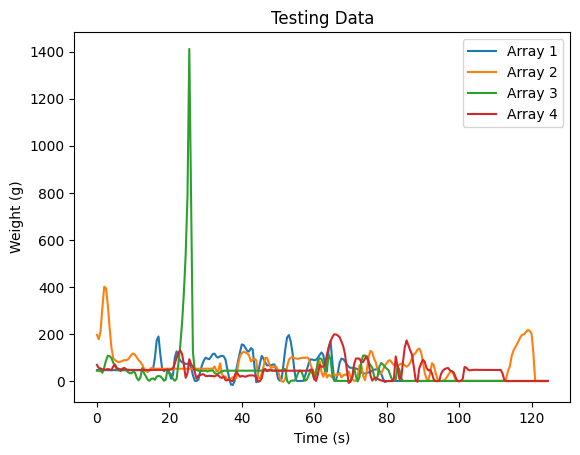

In [63]:
# Example data
time_readings = [0.00, 0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50, 5.00, 5.50, 6.00, 6.50, 7.00, 7.50, 8.00, 8.50, 9.00, 9.50, 10.00, 10.50, 11.00, 11.50, 12.00, 12.50, 13.00, 13.50, 14.00, 14.50, 15.00, 15.50, 16.00, 16.50, 17.00, 17.50, 18.00, 18.50, 19.00, 19.50, 20.00, 20.50, 21.00, 21.50, 22.00, 22.50, 23.00, 23.50, 24.00, 24.50, 25.00, 25.50, 26.00, 26.50, 27.00, 27.50, 28.00, 28.50, 29.00, 29.50, 30.00, 30.50, 31.00, 31.50, 32.00, 32.50, 33.00, 33.50, 34.00, 34.50, 35.00, 35.50, 36.00, 36.50, 37.00, 37.50, 38.00, 38.50, 39.00, 39.50, 40.00, 40.50, 41.00, 41.50, 42.00, 42.50, 43.00, 43.50, 44.00, 44.50, 45.00, 45.50, 46.00, 46.50, 47.00, 47.50, 48.00, 48.50, 49.00, 49.50, 50.00, 50.50, 51.00, 51.50, 52.00, 52.50, 53.00, 53.50, 54.00, 54.50, 55.00, 55.50, 56.00, 56.50, 57.00, 57.50, 58.00, 58.50, 59.00, 59.50, 60.00, 60.50, 61.00, 61.50, 62.00, 62.50, 63.00, 63.50, 64.00, 64.50, 65.00, 65.50, 66.00, 66.50, 67.00, 67.50, 68.00, 68.50, 69.00, 69.50, 70.00, 70.50, 71.00, 71.50, 72.00, 72.50, 73.00, 73.50, 74.00, 74.50, 75.00, 75.50, 76.00, 76.50, 77.00, 77.50, 78.00, 78.50, 79.00, 79.50, 80.00, 80.50, 81.00, 81.50, 82.00, 82.50, 83.00, 83.50, 84.00, 84.50, 85.00, 85.50, 86.00, 86.50, 87.00, 87.50, 88.00, 88.50, 89.00, 89.50, 90.00, 90.50, 91.00, 91.50, 92.00, 92.50, 93.00, 93.50, 94.00, 94.50, 95.00, 95.50, 96.00, 96.50, 97.00, 97.50, 98.00, 98.50, 99.00, 99.50, 100.00, 100.50, 101.00, 101.50, 102.00, 102.50, 103.00, 103.50, 104.00, 104.50, 105.00, 105.50, 106.00, 106.50, 107.00, 107.50, 108.00, 108.50, 109.00, 109.50, 110.00, 110.50, 111.00, 111.50, 112.00, 112.50, 113.00, 113.50, 114.00, 114.50, 115.00, 115.50, 116.00, 116.50, 117.00, 117.50, 118.00, 118.50, 119.00, 119.50, 120.00, 120.50, 121.00, 121.50, 122.00, 122.50, 123.00, 123.50, 124.00, 124.50]
weight_readings_1 = [46.30, 46.10, 46.10, 46.10, 46.10, 46.10, 46.10, 46.10, 46.10, 46.00, 46.00, 46.10, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 46.00, 45.90, 45.90, 45.80, 46.10, 46.00, 46.00, 46.00, 45.90, 51.00, 97.90, 172.90, 189.40, 113.10, 52.00, 41.60, 48.30, 45.00, 31.80, 9.70, 26.80, 99.70, 126.00, 103.70, 86.30, 79.80, 77.60, 72.50, 73.70, 74.20, 56.20, 24.70, 0.70, 0.30, 4.90, 39.30, 67.40, 86.50, 99.00, 95.10, 92.40, 103.10, 115.30, 115.90, 103.00, 99.70, 104.90, 107.20, 105.00, 90.80, 49.80, 13.10, -15.20, -16.70, -1.10, 49.40, 87.90, 122.90, 155.60, 152.70, 140.50, 128.10, 125.40, 140.00, 133.60, 61.50, -5.30, 34.70, 74.50, 106.80, 94.80, 78.10, 66.10, 67.30, 66.00, 69.70, 70.50, 47.00, 10.20, 1.30, 9.90, 70.20, 135.90, 184.80, 195.20, 168.20, 120.30, 45.80, 1.50, -0.10, 0.30, 0.50, 0.80, 23.40, 49.60, 76.40, 91.70, 91.30, 88.30, 90.30, 98.70, 111.40, 121.40, 110.70, 65.80, 40.00, 142.30, 170.10, 79.70, 4.60, 1.90, 34.40, 77.40, 95.40, 92.80, 83.50, 70.20, 60.60, 55.90, 56.00, 54.50, 53.30, 50.50, 42.40, 36.80, 31.70, 31.90, 33.90, 36.30, 39.90, 43.10, 48.30, 48.90, 50.70, 42.50, 30.50, 9.40, -4.60, -0.50, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20]
weight_readings_2 = [196.00, 177.80, 213.10, 311.80, 400.40, 394.60, 322.70, 226.20, 142.10, 97.00, 88.50, 83.50, 79.70, 82.30, 84.60, 89.10, 88.20, 90.90, 100.40, 111.00, 117.00, 111.90, 100.30, 88.70, 80.60, 69.50, 52.20, 41.30, 38.50, 46.10, 55.90, 53.40, 52.20, 52.30, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.20, 52.30, 52.30, 52.30, 52.20, 52.30, 52.30, 52.30, 52.30, 52.30, 52.20, 52.20, 53.20, 61.60, 41.90, 43.10, 75.00, 28.90, 19.50, 18.50, 7.50, 6.80, 12.10, 15.70, 10.30, 11.80, 71.70, 105.60, 118.20, 124.60, 121.00, 118.20, 108.40, 83.90, 89.20, 95.10, 87.60, 14.40, 11.80, 31.70, 61.30, 98.50, 97.00, 75.10, 57.10, 57.70, 61.90, 61.30, 43.10, 15.90, -1.90, -2.60, 10.00, 61.60, 90.30, 99.30, 101.70, 97.00, 95.80, 94.20, 97.00, 98.00, 98.90, 98.00, 100.40, 94.70, 68.20, 47.00, 28.90, 45.50, 66.30, 83.70, 37.70, 17.60, 45.00, 14.60, 25.20, 22.60, 13.90, 30.50, 21.70, 25.70, 34.10, 15.00, 23.80, 27.80, 25.30, 40.40, 18.70, 7.80, 0.70, 0.70, 19.80, 67.40, 67.30, 22.10, 3.40, 43.70, 100.60, 127.80, 122.60, 95.10, 79.30, 45.90, 29.20, 33.10, 48.20, 65.20, 76.20, 87.10, 87.70, 76.30, 67.80, 65.10, 64.90, 68.60, 74.00, 71.80, 66.60, 60.80, 66.40, 78.10, 97.60, 113.20, 119.90, 132.70, 138.10, 121.90, 81.90, 34.10, 9.00, 2.40, 34.50, 75.70, 67.30, 35.80, 9.10, 0.80, -0.60, 0.60, 4.80, 13.30, 26.50, 38.60, 40.90, 27.40, 5.10, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.50, 9.80, 44.20, 61.40, 105.70, 129.00, 143.80, 156.70, 173.10, 188.90, 196.80, 198.70, 209.60, 216.70, 213.20, 201.10, 117.90, 0.70, 0.30, 0.30, 0.30, 0.40, 0.40, 0.30, 0.30]
weight_readings_3 = [43.90, 43.20, 43.00, 35.00, 57.00, 87.20, 107.20, 106.10, 97.60, 77.80, 63.40, 49.40, 45.50, 50.60, 52.70, 52.60, 46.80, 39.00, 33.60, 32.60, 40.20, 35.60, 13.00, 2.80, 14.80, 55.00, 32.90, 20.20, 6.00, 0.80, 8.90, 11.10, 5.00, 19.30, 21.10, 19.80, 12.30, 0.90, 5.80, 51.50, 34.50, 28.20, 9.40, 0.80, 9.70, 75.10, 150.70, 245.60, 374.60, 538.30, 789.10, 1411.80, 780.60, 123.20, 45.70, 47.10, 43.80, 42.90, 42.90, 43.00, 43.90, 40.40, 43.80, 43.80, 45.70, 33.50, 30.20, 32.40, 36.40, 41.30, 43.70, 43.80, 43.80, 43.80, 43.80, 43.80, 43.90, 43.80, 43.80, 43.90, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.90, 43.90, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 43.80, 44.20, 51.80, 49.70, 0.60, -10.10, 0.50, 2.10, 1.40, 10.60, 32.80, 45.10, 38.90, 18.00, 0.60, 7.30, 25.70, 44.60, 31.60, 5.80, 30.90, 86.80, 96.60, 93.60, 73.60, 41.50, 61.80, 111.70, 91.20, 24.80, 0.60, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.30, 16.70, 56.90, 20.10, -1.80, 16.80, 83.20, 108.00, 108.70, 98.30, 79.90, 68.20, 56.80, 22.40, 2.40, 19.60, 62.80, 76.70, 69.90, 61.40, 52.60, 46.30, 24.70, 5.80, 0.60, 4.70, 62.40, 48.80, 12.00, -0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, -0.10, -0.10, 0.00, -0.10, 0.00, 0.00, -0.10, -0.10, -0.10, -0.10, -0.10, 0.00, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, -0.10, 0.00, 0.00, -0.10, -0.10, -0.10, -0.10, -0.10, 0.00, 0.00, 0.00, -0.10, -0.10, -0.10, 0.00, 0.00, 0.00, 0.00, -0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
weight_readings_4 = [68.70, 54.80, 53.30, 49.30, 48.40, 48.60, 50.80, 49.30, 45.70, 62.40, 69.70, 53.70, 52.40, 42.80, 48.40, 56.00, 50.70, 47.60, 47.30, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.00, 47.10, 47.00, 47.10, 47.10, 47.10, 47.10, 47.00, 47.10, 47.10, 47.10, 47.20, 48.70, 54.70, 74.00, 99.10, 120.00, 130.10, 115.20, 69.70, 13.50, 33.40, 92.60, 70.80, 62.20, 39.30, 9.50, 22.60, 24.60, 28.40, 28.20, 21.10, 20.90, 22.20, 20.90, 21.10, 19.70, 24.10, 24.30, 15.80, 13.20, 18.70, 3.20, 2.90, 6.60, 1.50, -0.10, 21.50, 38.80, 27.00, 18.10, 21.80, 20.10, 18.00, 21.20, 23.60, 23.80, 23.80, 22.00, 18.00, -3.80, -0.40, 11.40, 48.30, 51.40, 42.00, 47.70, 48.20, 44.20, 43.80, 43.90, 43.90, 43.70, 43.70, 43.80, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.70, 43.80, 48.80, 47.20, 10.80, 0.20, 27.70, 68.90, 60.20, 61.60, 69.80, 112.70, 143.50, 169.30, 186.80, 198.10, 198.10, 193.10, 186.60, 167.30, 148.10, 112.80, 47.90, -8.40, -3.30, 17.10, 70.50, 95.20, 96.20, 94.40, 79.10, 80.70, 95.20, 105.40, 83.90, 25.20, 1.70, 10.90, 14.70, 8.80, 4.80, 2.60, -0.40, -0.50, -0.50, -0.50, -0.50, -0.40, 12.10, 104.50, 63.30, 8.70, 11.40, 81.80, 143.80, 172.60, 150.90, 129.90, 111.50, 59.00, 2.40, -3.30, 54.30, 74.30, 90.10, 82.00, 55.50, 45.10, 46.70, 32.20, 6.30, -0.50, -0.50, -0.40, 29.70, 44.20, 50.20, 54.00, 55.10, 44.40, 41.60, 36.40, 16.90, -0.40, -1.10, -0.40, 9.70, 59.50, 56.50, 47.90, 45.00, 46.90, 47.50, 47.70, 47.40, 47.20, 47.30, 47.30, 47.10, 47.10, 47.20, 47.20, 47.20, 47.10, 47.20, 47.20, 47.20, 46.70, 31.30, 3.10, -0.60, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.50, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40, -0.40]

# Plotting
plt.plot(time_readings, weight_readings_1, label='Array 1')
plt.plot(time_readings, weight_readings_2, label='Array 2')
plt.plot(time_readings, weight_readings_3, label='Array 3')
plt.plot(time_readings, weight_readings_4, label='Array 4')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Testing Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

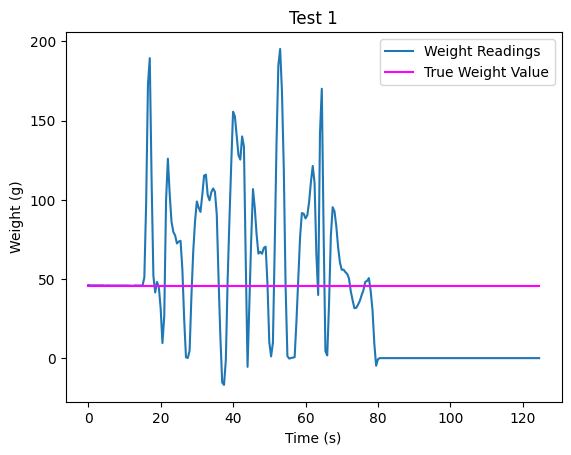

Tailored Algorithm Prediction: 45.8
Kalman Filter Prediction: 47.33962264150944


In [64]:
# Test 1
true_weight_1 = np.full(250, 46.0)

# Plotting
plt.plot(time_readings, weight_readings_1, label='Weight Readings')
plt.plot(time_readings, true_weight_1, label='True Weight Value', color = 'magenta')
# plt.plot(time_readings, tailored_predicted_weight_1, label='True Weight Value', color = 'green')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Test 1')

# Add legend
plt.legend()

# Display the plot
plt.show()

print("Tailored Algorithm Prediction: "+ str(determine_drongo_weight(weight_readings_1)))
print("Kalman Filter Prediction: "+ str(kalman_filter(weight_readings_1)))

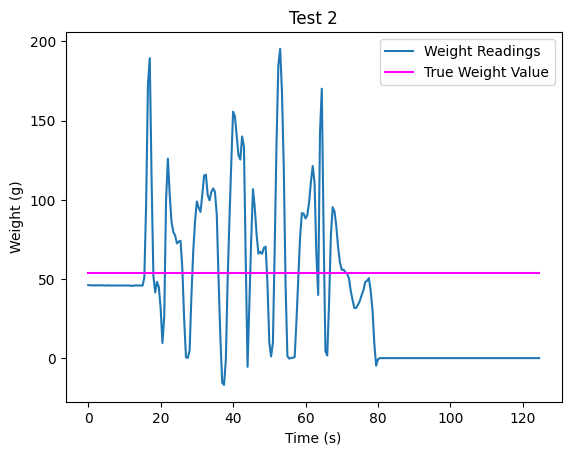

Tailored Algorithm Prediction: 52.0
Kalman Filter Prediction: 50.910204081632656


In [65]:
# Test 2
true_weight_2 = np.full(250, 54.0) #53 - 55

# Plotting
plt.plot(time_readings, weight_readings_1, label='Weight Readings')
plt.plot(time_readings, true_weight_2, label='True Weight Value', color = 'magenta')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Test 2')

# Add legend
plt.legend()

# Display the plot
plt.show()

print("Tailored Algorithm Prediction: "+ str(determine_drongo_weight(weight_readings_2)))
print("Kalman Filter Prediction: "+ str(kalman_filter(weight_readings_2)))

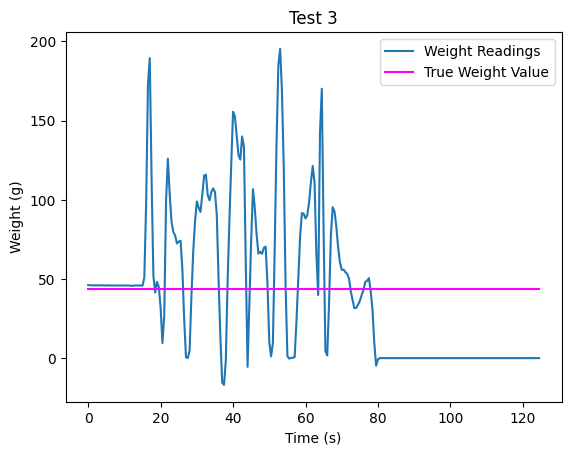

Tailored Algorithm Prediction: 43.599999999999994
Kalman Filter Prediction: 45.76153846153846


In [66]:
# Test 3
true_weight_3 = np.full(250, 44.0) #43 - 45

# Plotting
plt.plot(time_readings, weight_readings_1, label='Weight Readings')
plt.plot(time_readings, true_weight_3, label='True Weight Value', color = 'magenta')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Test 3')

# Add legend
plt.legend()

# Display the plot
plt.show()

print("Tailored Algorithm Prediction: "+ str(determine_drongo_weight(weight_readings_3)))
print("Kalman Filter Prediction: "+ str(kalman_filter(weight_readings_3)))

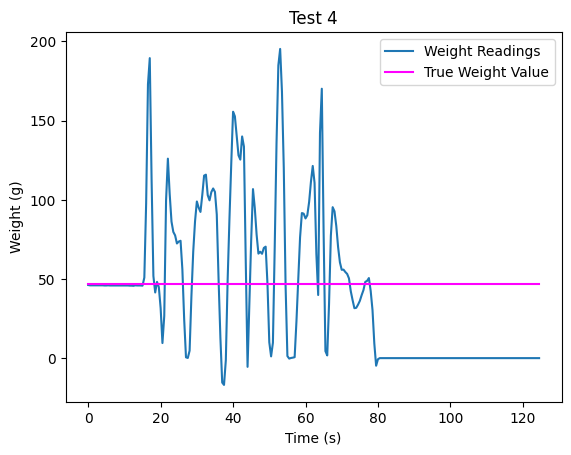

Tailored Algorithm Prediction: 43.5
Kalman Filter Prediction: 47.522772277227716


In [67]:
# Test 4
true_weight_4 = np.full(250, 47.0) #47 - 48

# Plotting
plt.plot(time_readings, weight_readings_1, label='Weight Readings')
plt.plot(time_readings, true_weight_4, label='True Weight Value', color = 'magenta')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Test 4')

# Add legend
plt.legend()

# Display the plot
plt.show()

print("Tailored Algorithm Prediction: "+ str(determine_drongo_weight(weight_readings_4)))
print("Kalman Filter Prediction: "+ str(kalman_filter(weight_readings_4)))